# Sparse graph based networks - some experiments for network type 2

Nets similar to Kipf (https://arxiv.org/abs/1609.02907), but different. However, the suffix 'kipf' sticked

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

import graph_utils as graph_utils
import graph_neural_networks as graph_nn
import data_preparation_utils as data_prep
from iterative_updaters import VanillaGradientDescent, MomentumGradientDescent, NesterovMomentumGradientDescent, RMSPropGradientDescent, AdamGradientDescent
import training_and_evaluation as train_eval
import graph_nn_experiments as experiments

C:\Users\Lukasz\AppData\Local\conda\conda\envs\aind\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
artificial_adj_matrix = np.array([[1,1,0,0],[1,1,1,0],[0,1,1,1],[0,0,1,1]])
print(artificial_adj_matrix)

[[1 1 0 0]
 [1 1 1 0]
 [0 1 1 1]
 [0 0 1 1]]


In [3]:
artificial_edges = graph_nn.extract_undirected_edges(artificial_adj_matrix)

In [8]:
artificial_edges_matrix, artificial_edges_bias = graph_nn.get_kipfs_transfer_matrix_plus_bias_vector(artificial_edges)

In [9]:
sess =  tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
m = sess.run(artificial_edges_matrix)
v = sess.run(artificial_edges_bias)
sess.close()
print(m)
print(v)

[[0.70710677 0.57735026 0.         0.        ]
 [0.70710677 0.57735026 0.57735026 0.        ]
 [0.         0.57735026 0.57735026 0.70710677]
 [0.         0.         0.57735026 0.70710677]]
[0. 0. 0. 0.]


__NOTE__: The matrix above has been generated with a hack in transfer matrix generator - just to check if Glorot type initialization works properly. __The hack has been removed since__

In [2]:
ochota_adj_matrix = np.genfromtxt("macierz_sasiedztwa.txt")

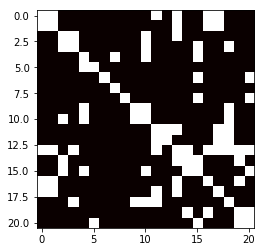

In [11]:
plt.imshow(ochota_adj_matrix, cmap='hot', interpolation='nearest')
plt.show()

In [15]:
ochota_edges = graph_nn.extract_undirected_edges(ochota_adj_matrix)

In [16]:
ochota_edges_matrix, ochota_edges_bias = graph_nn.get_kipfs_transfer_matrix_plus_bias_vector(ochota_edges)

In [17]:
sess =  tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
m = sess.run(ochota_edges_matrix)
v = sess.run(ochota_edges_bias)
sess.close()
print(m)
print(v)

[[0.40824828 0.4472136  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.40824828
  0.         0.28867513 0.         0.         0.4472136  0.40824828
  0.         0.         0.        ]
 [0.40824828 0.4472136  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.28867513 0.         0.         0.4472136  0.40824828
  0.         0.         0.        ]
 [0.         0.         0.40824828 0.40824828 0.         0.
  0.         0.         0.         0.         0.3779645  0.
  0.         0.28867513 0.4472136  0.33333334 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.40824828 0.40824828 0.         0.
  0.         0.         0.         0.         0.3779645  0.
  0.         0.28867513 0.         0.33333334 0.         0.
  0.3779645  0.         0.        ]
 [0.         0.         0.         0.         0.40824828 0.57735026
  0.         0.70710677 0.         0.5      

In [18]:
np.sum(m*m, axis=0)

array([0.9999999 , 0.99999994, 0.9999999 , 0.9999999 , 0.9999999 ,
       0.99999994, 0.99999994, 0.99999994, 0.99999994, 1.        ,
       1.0000002 , 0.9999999 , 1.        , 0.9999998 , 0.99999994,
       1.        , 0.99999994, 0.9999999 , 1.0000002 , 0.99999994,
       1.0000002 ], dtype=float32)

__NOTE__: The matrix above has been generated with a hack in transfer matrix generator - just to check if Glorot type initialization works properly. __The hack has been removed since__

In [20]:
inp = tf.placeholder(dtype=tf.float32,shape=[None,21])
nn = graph_nn.kipfs_transfer_matrix_neural_net(inp, 3, 2, tf.nn.tanh, ochota_adj_matrix, verbose=True)
print(nn.shape)

(21, 21, 1, 2)
(?, 21, 2)
(21, 21, 2, 2)
(?, 21, 2)
(21, 21, 2, 2)
(?, 21, 2)
(?, 42)
(?, 1)


In [21]:
random_input = np.random.normal(loc=0.0,scale=1.0,size=[1,21])

In [30]:
sess = tf.Session()
init = tf.global_variables_initializer()
for i in range(3):
    sess.run(init)
    transfered = sess.run(nn, feed_dict={inp: random_input})
    print(transfered)
sess.close()

[[-0.40522397]]
[[0.28050095]]
[[0.09614912]]


It works!

**Now try the alternating transfer matrix architecture on 100k traffic lights dataset:**

Load the data:

In [3]:
traffic_lights_data = pd.read_csv("100k.csv", header=None)
traffic_lights_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,81,14,58,108,83,60,82,61,64,94,...,28,87,73,69,25,7,77,95,5,49082
1,81,92,16,44,95,64,110,98,95,105,...,42,5,40,105,118,48,40,62,45,51223
2,75,20,66,104,20,65,80,97,2,81,...,119,115,118,64,68,46,45,43,18,51461
3,30,42,65,108,67,81,85,32,83,48,...,107,79,44,90,6,25,46,102,62,45119
4,117,20,52,40,25,36,87,78,99,70,...,92,21,34,102,37,46,11,9,66,50660


Normalize:

In [4]:
X, y, X_scaler, y_scaler = data_prep.scale_standard_traffic_light_data(traffic_lights_data)

C:\Users\Lukasz\AppData\Local\conda\conda\envs\aind\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Train test split:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=831191)

In [6]:
nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
nn_output = graph_nn.kipfs_transfer_matrix_neural_net(nn_input, 5, 4, tf.nn.tanh, ochota_adj_matrix, verbose=True)

(21, 21, 1, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(21, 21, 4, 4)
(?, 21, 4)
(?, 84)


Optimizer:

In [7]:
optimizer = tf.train.AdamOptimizer(0.005)

Batch iterator:

In [8]:
batch_iterator = data_prep.BatchIterator(X_train, y_train, 997)

Train for several epochs:

In [9]:
test_and_batch_losses = train_eval.train_model(nn_output, nn_input, targets, optimizer, 300000, batch_iterator, X_test, y_test, "trained_networks/kipfs_5_4_tanh_model.ckpt", 1000, verbose=True)

Test loss: 1.066024, batch loss: 1.063955, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.430809, batch loss: 0.404716, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.342113, batch loss: 0.339442, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.281439, batch loss: 0.279028, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.269276, batch loss: 0.263346, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.226083, batch loss: 0.221219, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.215899, batch loss: 0.192443, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.195017, batch loss: 0.192264, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.186335, batch loss: 0.184241, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.177794, batch loss: 0.172526, model saved under tra

Test loss: 0.092740, batch loss: 0.084591, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.092201, batch loss: 0.085087, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.099932, batch loss: 0.083958, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.092889, batch loss: 0.084366, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.091895, batch loss: 0.085908, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.090240, batch loss: 0.082446, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.092213, batch loss: 0.080148, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.089329, batch loss: 0.087213, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.090525, batch loss: 0.079728, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.088968, batch loss: 0.077324, model saved under tra

Test loss: 0.082040, batch loss: 0.071558, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.082366, batch loss: 0.071213, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.084287, batch loss: 0.075486, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.081194, batch loss: 0.068875, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.081759, batch loss: 0.066162, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.084496, batch loss: 0.066002, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.083032, batch loss: 0.066240, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.081164, batch loss: 0.068113, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.081056, batch loss: 0.066598, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.083028, batch loss: 0.068081, model saved under tra

Test loss: 0.079898, batch loss: 0.060380, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.078029, batch loss: 0.063992, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.077508, batch loss: 0.064999, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.078117, batch loss: 0.050488, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.078141, batch loss: 0.061506, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.078485, batch loss: 0.062815, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.079827, batch loss: 0.058850, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.077322, batch loss: 0.063776, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.077005, batch loss: 0.069448, model saved under trained_networks/kipfs_5_4_tanh_model.ckpt
Test loss: 0.078092, batch loss: 0.060353, model saved under tra

In [10]:
model_avg_error, actual_vs_predicted = train_eval.evaluate_model_on_a_dataset("trained_networks/kipfs_5_4_tanh_model.ckpt", nn_output,nn_input, X_test, y_test, y_scaler)
print(model_avg_error)

INFO:tensorflow:Restoring parameters from trained_networks/kipfs_5_4_tanh_model.ckpt
0.014606311996258548


Some gradient descent experiments:

In [7]:
# close session (if open)
try:
    sess.close()
except:
    pass

# open new session
sess =  tf.Session()

saver = tf.train.Saver()
saver.restore(sess, "trained_networks/kipfs_5_4_tanh_model.ckpt")

INFO:tensorflow:Restoring parameters from trained_networks/kipfs_test_model.ckpt


In [42]:
updater = MomentumGradientDescent()

trajectory = train_eval.generate_gradient_descent_trajectory(sess, nn_output, nn_input, X_scaler, y_scaler, updater, 3000, 30, verbose=True)

Prediction 50304.386719, rounded: 50351.351562
Prediction 37843.117188, rounded: 37834.191406
Prediction 35072.292969, rounded: 35085.996094
Prediction 34487.871094, rounded: 34490.687500
Prediction 34411.433594, rounded: 34408.906250
Prediction 34377.781250, rounded: 34385.832031
Prediction 34353.914062, rounded: 34352.949219
Prediction 34334.644531, rounded: 34342.476562
Prediction 34319.128906, rounded: 34320.933594
Prediction 34307.257812, rounded: 34306.785156
Prediction 34298.527344, rounded: 34302.500000
Prediction 34292.042969, rounded: 34300.019531
Prediction 34286.988281, rounded: 34293.273438
Prediction 34282.761719, rounded: 34291.089844
Prediction 34279.050781, rounded: 34276.835938
Prediction 34275.675781, rounded: 34275.410156
Prediction 34272.542969, rounded: 34273.515625
Prediction 34269.593750, rounded: 34268.570312
Prediction 34266.789062, rounded: 34267.960938
Prediction 34264.113281, rounded: 34265.597656
Prediction 34261.546875, rounded: 34264.523438
Prediction 34

In [43]:
no_of_trajectories = 100

updater = NesterovMomentumGradientDescent()

trajectories = train_eval.generate_and_join_multiple_gradient_descent_trajectories(sess, no_of_trajectories, nn_output, nn_input, X_scaler, y_scaler, updater, 3000, 30, verbose=True, trajectories_verbose=False)

Generating trajectory 1
Generating trajectory 2
Generating trajectory 3
Generating trajectory 4
Generating trajectory 5
Generating trajectory 6
Generating trajectory 7
Generating trajectory 8
Generating trajectory 9
Generating trajectory 10
Generating trajectory 11
Generating trajectory 12
Generating trajectory 13
Generating trajectory 14
Generating trajectory 15
Generating trajectory 16
Generating trajectory 17
Generating trajectory 18
Generating trajectory 19
Generating trajectory 20
Generating trajectory 21
Generating trajectory 22
Generating trajectory 23
Generating trajectory 24
Generating trajectory 25
Generating trajectory 26
Generating trajectory 27
Generating trajectory 28
Generating trajectory 29
Generating trajectory 30
Generating trajectory 31
Generating trajectory 32
Generating trajectory 33
Generating trajectory 34
Generating trajectory 35
Generating trajectory 36
Generating trajectory 37
Generating trajectory 38
Generating trajectory 39
Generating trajectory 40
Generatin

In [44]:
predictions_from_trajectories = [x[1] for x in trajectories]
print("Min prediction: %f" % min(predictions_from_trajectories))
print("Mean prediction: %f" % np.mean(predictions_from_trajectories))
print("Median prediction: %f" % np.median(predictions_from_trajectories))

Min prediction: 33114.023438
Mean prediction: 35000.718750
Median prediction: 34627.390625


### Experiments with random graphs

In [3]:
random_topologies_results = np.genfromtxt("random_topologies_3_2_kipf.csv",delimiter=",")

In [4]:
rand_top_data_frame = pd.DataFrame(random_topologies_results, columns=["SymmetricDiff","RelativeError","MeanSquaredError"])
medians = rand_top_data_frame.groupby("SymmetricDiff").median()
lower_five_perc = rand_top_data_frame.groupby("SymmetricDiff").quantile(0.05)
upper_five_perc = rand_top_data_frame.groupby("SymmetricDiff").quantile(0.95)
medians

,RelativeError,MeanSquaredError
SymmetricDiff,,
0.0,0.018095,0.116369
3.0,0.018059,0.116044
6.0,0.018190,0.118067
9.0,0.018214,0.118226
12.0,0.018245,0.118642
15.0,0.018461,0.121556
18.0,0.018527,0.122222
21.0,0.018642,0.123337
24.0,0.018757,0.124791


In [5]:
rand_top_data_frame_ = rand_top_data_frame.copy()
rand_top_data_frame_["Count"] = 1
rand_top_data_frame_ = rand_top_data_frame_[["SymmetricDiff","Count"]]
rand_top_data_frame_.groupby("SymmetricDiff").sum()

,Count
SymmetricDiff,
0.0,73
3.0,73
6.0,73
9.0,73
12.0,73
15.0,73
18.0,73
21.0,73
24.0,73


In [6]:
rel_error_y_err_max = pd.DataFrame()
rel_error_y_err_max["RelativeErrorMax"] = upper_five_perc.loc[:,"RelativeError"] - medians.loc[:,"RelativeError"]
rel_error_y_err_min = pd.DataFrame()
rel_error_y_err_min["RelativeErrorMin"] = medians.loc[:,"RelativeError"] - lower_five_perc.loc[:,"RelativeError"]
rel_error_y_err = pd.concat([rel_error_y_err_min,rel_error_y_err_max], axis=1).transpose().iloc[0:2,:]

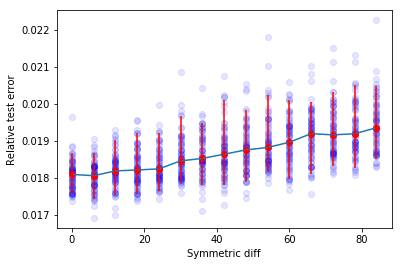

In [7]:
plt.plot(rand_top_data_frame.iloc[:,0] * 2,rand_top_data_frame.iloc[:,1],"bo", alpha=0.1, zorder=-32)
plt.plot(medians.index.values * 2,medians.iloc[:,0], "ro",zorder=-32)
plt.errorbar(medians.index.values * 2,medians.iloc[:,0],yerr=rel_error_y_err.values,ecolor="r", barsabove=True)
plt.xlabel("Symmetric diff")
plt.ylabel("Relative test error")
plt.show()

In [8]:
ms_error_y_err_max = pd.DataFrame()
ms_error_y_err_max["MeanSquaredErrorMax"] = upper_five_perc.loc[:,"MeanSquaredError"] - medians.loc[:,"MeanSquaredError"]
ms_error_y_err_min = pd.DataFrame()
ms_error_y_err_min["MeanSquaredErrorMin"] = medians.loc[:,"MeanSquaredError"] - lower_five_perc.loc[:,"MeanSquaredError"]
ms_error_y_err = pd.concat([ms_error_y_err_min,ms_error_y_err_max], axis=1).transpose().iloc[0:2,:]

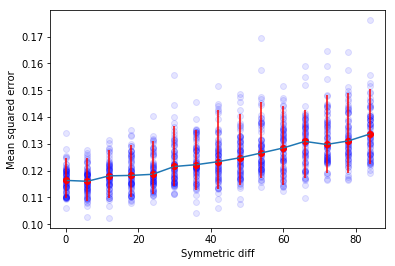

In [9]:
plt.plot(rand_top_data_frame.iloc[:,0] * 2,rand_top_data_frame.iloc[:,2],"bo", alpha=0.1, zorder=-32)
plt.plot(medians.index.values * 2,medians.iloc[:,1], "ro", zorder=-32)
plt.errorbar(medians.index.values * 2,medians.iloc[:,1],yerr=ms_error_y_err.values,ecolor="r", barsabove=True)
plt.xlabel("Symmetric diff")
plt.ylabel("Mean squared error")
plt.show()

### Permuted topologies results summary

In [10]:
permuted_topologies_results = np.genfromtxt("permuted_topologies_0_kipf.csv",delimiter=",")

In [11]:
perm_top_data_frame = pd.DataFrame(permuted_topologies_results, columns=["NoOfTranspositions","SymmetricDiff","RelativeError","MeanSquaredError"])
medians = perm_top_data_frame.groupby("SymmetricDiff").median()
lower_five_perc = perm_top_data_frame.groupby("SymmetricDiff").quantile(0.05)
upper_five_perc = perm_top_data_frame.groupby("SymmetricDiff").quantile(0.95)
medians

,NoOfTranspositions,RelativeError,MeanSquaredError
SymmetricDiff,,,
0.0,0.0,0.018205,0.118335
2.0,1.0,0.018209,0.116288
4.0,1.5,0.018184,0.118158
8.0,1.0,0.017848,0.114576
10.0,1.0,0.018098,0.115821
12.0,1.0,0.018172,0.118153
14.0,1.0,0.018149,0.119194
16.0,1.0,0.018229,0.118034
18.0,2.0,0.018096,0.116299


In [12]:
perm_top_data_frame_ = perm_top_data_frame.copy()
perm_top_data_frame_["Count"] = 1
perm_top_data_frame_ = perm_top_data_frame_[["SymmetricDiff","Count"]]
perm_top_data_frame_.groupby("SymmetricDiff").sum()

,Count
SymmetricDiff,
0.0,58
2.0,1
4.0,2
8.0,7
10.0,4
12.0,15
14.0,15
16.0,13
18.0,9


In [13]:
rel_error_y_err_max = pd.DataFrame()
rel_error_y_err_max["RelativeErrorMax"] = upper_five_perc.loc[:,"RelativeError"] - medians.loc[:,"RelativeError"]
rel_error_y_err_min = pd.DataFrame()
rel_error_y_err_min["RelativeErrorMin"] = medians.loc[:,"RelativeError"] - lower_five_perc.loc[:,"RelativeError"]
rel_error_y_err = rel_error_y_err_min

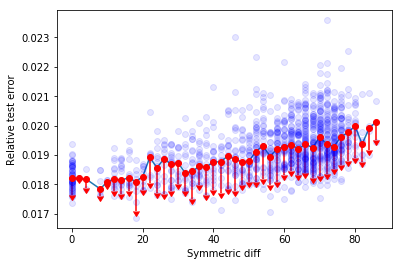

In [14]:
plt.plot(perm_top_data_frame.iloc[:,1],perm_top_data_frame.iloc[:,2],"bo",alpha=0.1)
plt.plot(medians.index.values,medians.iloc[:,1], "ro")
plt.errorbar(medians.index.values,medians.iloc[:,1],yerr=rel_error_y_err.values,lolims=False,uplims=True,ecolor="r", barsabove=True)
plt.xlabel("Symmetric diff") # <-- not divided by two here
plt.ylabel("Relative test error")
plt.show()

In [15]:
ms_error_y_err_max = pd.DataFrame()
ms_error_y_err_max["MeanSquaredErrorMax"] = upper_five_perc.loc[:,"MeanSquaredError"] - medians.loc[:,"MeanSquaredError"]
ms_error_y_err_min = pd.DataFrame()
ms_error_y_err_min["MeanSquaredErrorMin"] = medians.loc[:,"MeanSquaredError"] - lower_five_perc.loc[:,"MeanSquaredError"]
ms_error_y_err = ms_error_y_err_min

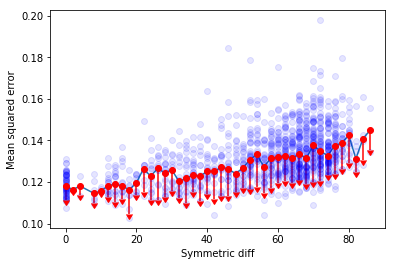

In [16]:
plt.plot(perm_top_data_frame.iloc[:,1],perm_top_data_frame.iloc[:,3],"bo", alpha=0.1)
plt.plot(medians.index.values,medians.iloc[:,2], "ro")
plt.errorbar(medians.index.values,medians.iloc[:,2],yerr=ms_error_y_err.values,lolims=False,uplims=True,ecolor="r", barsabove=True)
plt.xlabel("Symmetric diff") # <-- not divided by two here
plt.ylabel("Mean squared error")
plt.show()